<a href="https://colab.research.google.com/github/Danielewicz-code/Diabetes-log/blob/main/Diabetes_Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings


In [29]:
#traer el dataset y ver el tamaño de los datos
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.size

6912

In [40]:
#visualizar la información
print(diabetes_data.head())

print(diabetes_data.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [43]:
#ver distintas vistas del dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

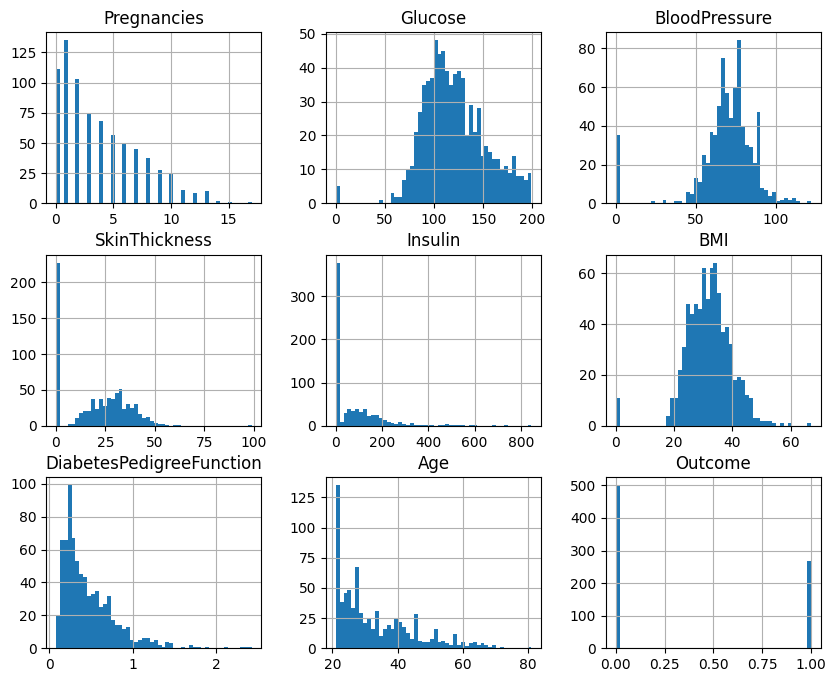

In [55]:
#ver las graficas de cada caracteristica
diabetes_data.hist(bins=50, figsize= (10, 8))

Pasar a hacer el modelo ya que no hay nada que limpiar o modificar


In [87]:
#aqui lo que queremos saber es si alguien tiene o no diabetes entonces borraremos los "outcomes" en x y los pasaremos solo a y como etiquetas
X = diabetes_data.drop('Outcome', axis= 'columns')
Y = diabetes_data['Outcome']

#dividir el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.2, random_state=69)

#crear el modelo de regresion logistica
model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)

score= model.predict(X_test)

acertividad = accuracy_score(Y_test, score)

print(f'esta es la acertividad hdp: {acertividad}')

esta es la acertividad hdp: 0.7609756097560976


 Graficar el rendimiento del modelo

In [ ]:
#basicamente la columna ROC es que tan acertivo es el modelo para diagnosticar, que este arriba a la derecha es una buena señal ya que abajo a
#la izquierda serian predicciones falsas positivas, entre mas certano al numero 1, mejor es el modelo


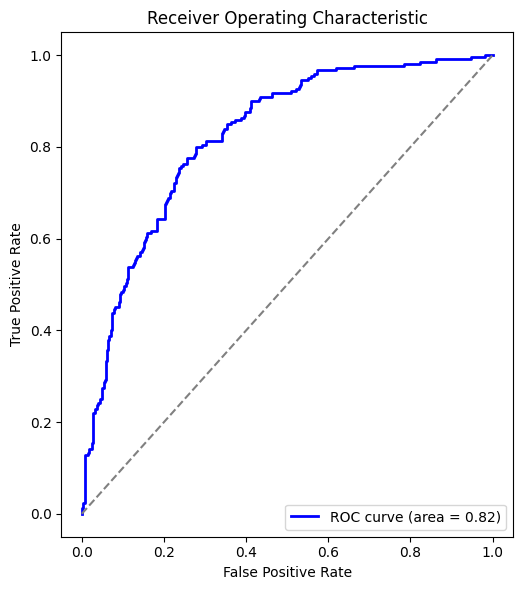

In [83]:
#graficos creados con chatgpt

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Obtener las probabilidades de predicción para la clase positiva (diabetes)
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, predicted_probabilities)
roc_auc = roc_auc_score(Y_test, predicted_probabilities)

# Calcular la curva de precisión-recuperación
precision, recall, _ = precision_recall_curve(Y_test, predicted_probabilities)
average_precision = average_precision_score(Y_test, predicted_probabilities)

# Crear las gráficas
plt.figure(figsize=(10, 6))

# Curva ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

Ejemplo de predicción

In [85]:
#tomamos un ejemplo de los datos de testeo y lo probamos individualmente
predict_ej= X_test.iloc[359]

prediction= model.predict([predict_ej])


warnings.filterwarnings("ignore")

print(f'Sera 0 si no hay diabetes en el paciente y 1 sera que si tiene, la predicción es: {prediction}')

Sera 0 si no hay diabetes en el paciente y 1 sera que si tiene, la predicción es: [1]
